<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/Text_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Processing**

# Importing Libraries

In [ ]:
import numpy as np      # linear algebra
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)
import string           # special operations on strings
import spacy            # language models

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [ ]:
#Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

# Define stop words
stop_words = stopwords.words('english')

# Initialize the Porter Stemmer
ps = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data

In [ ]:
t1 = pd.read_csv("/content/apple.txt",on_bad_lines='skip')

In [ ]:
t1

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [ ]:
reviews=t1["x"]

In [ ]:
def preprocess_text(text):
    # Strip unnecessary spaces
    text = text.strip()
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation using maketrans and translate
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    # Tokenize text
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Perform stemming
    words = [ps.stem(word) for word in words]

    return words

In [ ]:
## Instead of stemming we can also use Lemmatizing as shown in th code below
#    from nltk.stem import WordNetLemmatizer
#    words = [lemmatizer.lemmatize(word) for word in words]

In [ ]:
processed_reviews = reviews.apply(preprocess_text)

In [ ]:
processed_reviews[0:10]

,x
0,"[amaz, batteri, last, around, 10, 12, hrsbest,..."
1,"[final, macbook, possess, got, 50k, diwali, sa..."
2,"[best, laptop, 60k, dont, want, account, softw..."
3,"[pros1, light, weight, super, fast, respons, t..."
4,[]
5,"[upset, product, check, macbook, 15, day, back..."
6,"[reason, 1, star, ot, defect, piec, sound, qua..."
7,"[got, appl, macbook, air, amazon, discount, sa..."
8,"[white, line, come, screen, three, month, purc..."
9,"[bought, product, recent, 5, april, work, perf..."


In [ ]:
len(processed_reviews)

40

In [ ]:
for i in range(len(processed_reviews)):
  processed_reviews[i] = ' '.join(processed_reviews[i])


In [ ]:
processed_reviews[0:10]

,x
0,amaz batteri last around 10 12 hrsbest laptop ...
1,final macbook possess got 50k diwali sale tech...
2,best laptop 60k dont want account softwar like...
3,pros1 light weight super fast respons time2 hi...
4,
5,upset product check macbook 15 day back decemb...
6,reason 1 star ot defect piec sound qualiti goo...
7,got appl macbook air amazon discount sale1 os ...
8,white line come screen three month purchas ama...
9,bought product recent 5 april work perfectli f...


# Count vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# Fit and transform the processed reviews
X = vectorizer.fit_transform(processed_reviews)

# Convert the result to a DataFrame for better readability
count_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the count dataframe
print(count_df)

    10  104  10day  11  111  1112  12  12000  128  128gb  ...  write  writer  \
0    1    0      0   0    0     0   1      0    0      0  ...      0       0   
1    0    0      0   0    1     0   0      0    0      0  ...      0       1   
2    0    0      0   0    0     0   0      0    0      1  ...      0       0   
3    0    0      0   0    0     0   0      0    0      0  ...      0       0   
4    0    0      0   0    0     0   0      0    0      0  ...      0       0   
5    0    0      0   0    0     0   0      0    0      0  ...      0       0   
6    0    0      0   0    0     0   0      0    0      0  ...      0       0   
7    0    0      0   0    0     0   0      0    0      1  ...      0       0   
8    0    0      0   0    0     0   0      0    0      0  ...      0       0   
9    0    0      1   0    0     0   0      0    0      0  ...      0       0   
10   0    0      0   0    0     0   0      0    0      0  ...      0       0   
11   0    0      0   0    0     0   0   

In [ ]:
#Display the vocabulary list
vocabulary = vectorizer.vocabulary_
print("Vocabulary List:")
print(vocabulary)


Vocabulary List:
{'amaz': 68, 'batteri': 115, 'last': 438, 'around': 91, '10': 0, '12': 6, 'hrsbest': 375, 'laptop': 431, 'student': 732, 'coder': 175, 'final': 307, 'macbook': 469, 'possess': 586, 'got': 342, '50k': 36, 'diwali': 238, 'sale': 653, 'technic': 748, 'good': 339, 'laptopgood': 434, 'newsluxuri': 522, 'product': 603, 'nich': 524, 'technolog': 749, 'life': 447, 'reliabl': 631, 'machin': 471, 'crash': 199, 'becom': 118, 'defunct': 219, '610': 46, 'year': 844, 'antiviru': 78, 'requir': 638, 'secur': 667, 'data': 210, 'transact': 784, 'much': 513, 'better': 123, 'terrif': 753, 'sens': 672, 'pridebad': 596, 'news': 521, 'problem': 600, 'switch': 741, 'window': 825, 'base': 113, 'system': 742, 'less': 444, 'space': 706, 'hard': 355, 'disk': 233, 'cd': 161, 'drive': 244, 'inabl': 388, 'transfer': 785, 'mac': 468, 'exist': 279, 'extern': 290, 'disc': 231, 'unless': 792, 'format': 317, 'app': 81, 'mostli': 507, 'paid': 560, 'unreason': 793, 'expens': 281, 'free': 320, 'avail': 99, 

In [ ]:
vocab_df = pd.DataFrame(vocabulary.items(), columns=['Word', 'count'])
print(vocab_df)

         Word  count
0        amaz     68
1     batteri    115
2        last    438
3      around     91
4          10      0
..        ...    ...
843  friendli    324
844   compact    180
845    remark    632
846       455     30
847    almost     65

[848 rows x 2 columns]


# Using unigrams,bigrams and trigrams

In [ ]:
# Initialize the CountVectorizer with unigrams, bigrams, and trigrams
vectorizer = CountVectorizer(ngram_range=(1, 3))

# Fit and transform the processed reviews
X = vectorizer.fit_transform(processed_reviews)

# Convert the result to a DataFrame for better readability
count_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

#Display the vocabulary list
vocabulary = vectorizer.vocabulary_
print("Vocabulary List:")
print(vocabulary)


Vocabulary List:
{'amaz': 265, 'batteri': 521, 'last': 2125, 'around': 416, '10': 0, '12': 22, 'hrsbest': 1847, 'laptop': 2057, 'student': 3659, 'coder': 852, 'amaz batteri': 266, 'batteri last': 530, 'last around': 2126, 'around 10': 417, '10 12': 1, '12 hrsbest': 23, 'hrsbest laptop': 1848, 'laptop student': 2101, 'student coder': 3660, 'amaz batteri last': 267, 'batteri last around': 531, 'last around 10': 2127, 'around 10 12': 418, '10 12 hrsbest': 2, '12 hrsbest laptop': 24, 'hrsbest laptop student': 1849, 'laptop student coder': 2102, 'final': 1452, 'macbook': 2308, 'possess': 2883, 'got': 1671, '50k': 133, 'diwali': 1151, 'sale': 3287, 'technic': 3740, 'good': 1623, 'laptopgood': 2113, 'newsluxuri': 2602, 'product': 2986, 'nich': 2608, 'technolog': 3743, 'life': 2171, 'reliabl': 3165, 'machin': 2336, 'crash': 961, 'becom': 551, 'defunct': 1041, '610': 168, 'year': 4281, 'antiviru': 316, 'requir': 3211, 'secur': 3361, 'data': 997, 'transact': 3901, 'much': 2536, 'better': 576, 't

# TF-IDF model


In [ ]:
# Initialize the TfidfVectorizer with unigrams, bigrams, and trigrams
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Fit and transform the processed reviews
X = vectorizer.fit_transform(processed_reviews)

# Convert the result to a DataFrame for better readability
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the TF-IDF dataframe
print(tfidf_df)

          10     10 12  10 12 hrsbest    10 day  10 day given   10 year  \
0   0.169640  0.204979       0.204979  0.000000      0.000000  0.000000   
1   0.000000  0.000000       0.000000  0.000000      0.000000  0.000000   
2   0.000000  0.000000       0.000000  0.000000      0.000000  0.000000   
3   0.000000  0.000000       0.000000  0.000000      0.000000  0.000000   
4   0.000000  0.000000       0.000000  0.000000      0.000000  0.000000   
5   0.000000  0.000000       0.000000  0.000000      0.000000  0.000000   
6   0.000000  0.000000       0.000000  0.000000      0.000000  0.000000   
7   0.000000  0.000000       0.000000  0.000000      0.000000  0.000000   
8   0.000000  0.000000       0.000000  0.000000      0.000000  0.000000   
9   0.000000  0.000000       0.000000  0.000000      0.000000  0.000000   
10  0.000000  0.000000       0.000000  0.000000      0.000000  0.000000   
11  0.000000  0.000000       0.000000  0.000000      0.000000  0.000000   
12  0.000000  0.000000   

In [ ]:
text = ' '.join(processed_reviews)
text

'amaz batteri last around 10 12 hrsbest laptop student coder final macbook possess got 50k diwali sale technic good laptopgood newsluxuri product nich technolog good batteri life reliabl machin laptop crash becom defunct 610 year antiviru requir secur data transact much better terrif sens possess pridebad news problem switch window base system less space hard disk cd drive inabl transfer data mac exist extern hard disc unless format app mostli paid unreason expens free app avail otherwis googl play store even angri bird cost rs 400 printer compat eg econom mfd laser printer ricoh sp 111 cant use huge compat issu page ms word keynot powerpoint unless master work still mostli document slide either open window environ distort issu need spend extra extern cd writer tp buy carri bag mac con connect projector unless buy connector expens there clariti one buy cant connect tv port differ there clariti custom support manual help section silent market strategi indian market plan bad critic issu 

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Define a function to plot word cloud
def plot_cloud(wc):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wc)
    # No axis details
    plt.axis("off");

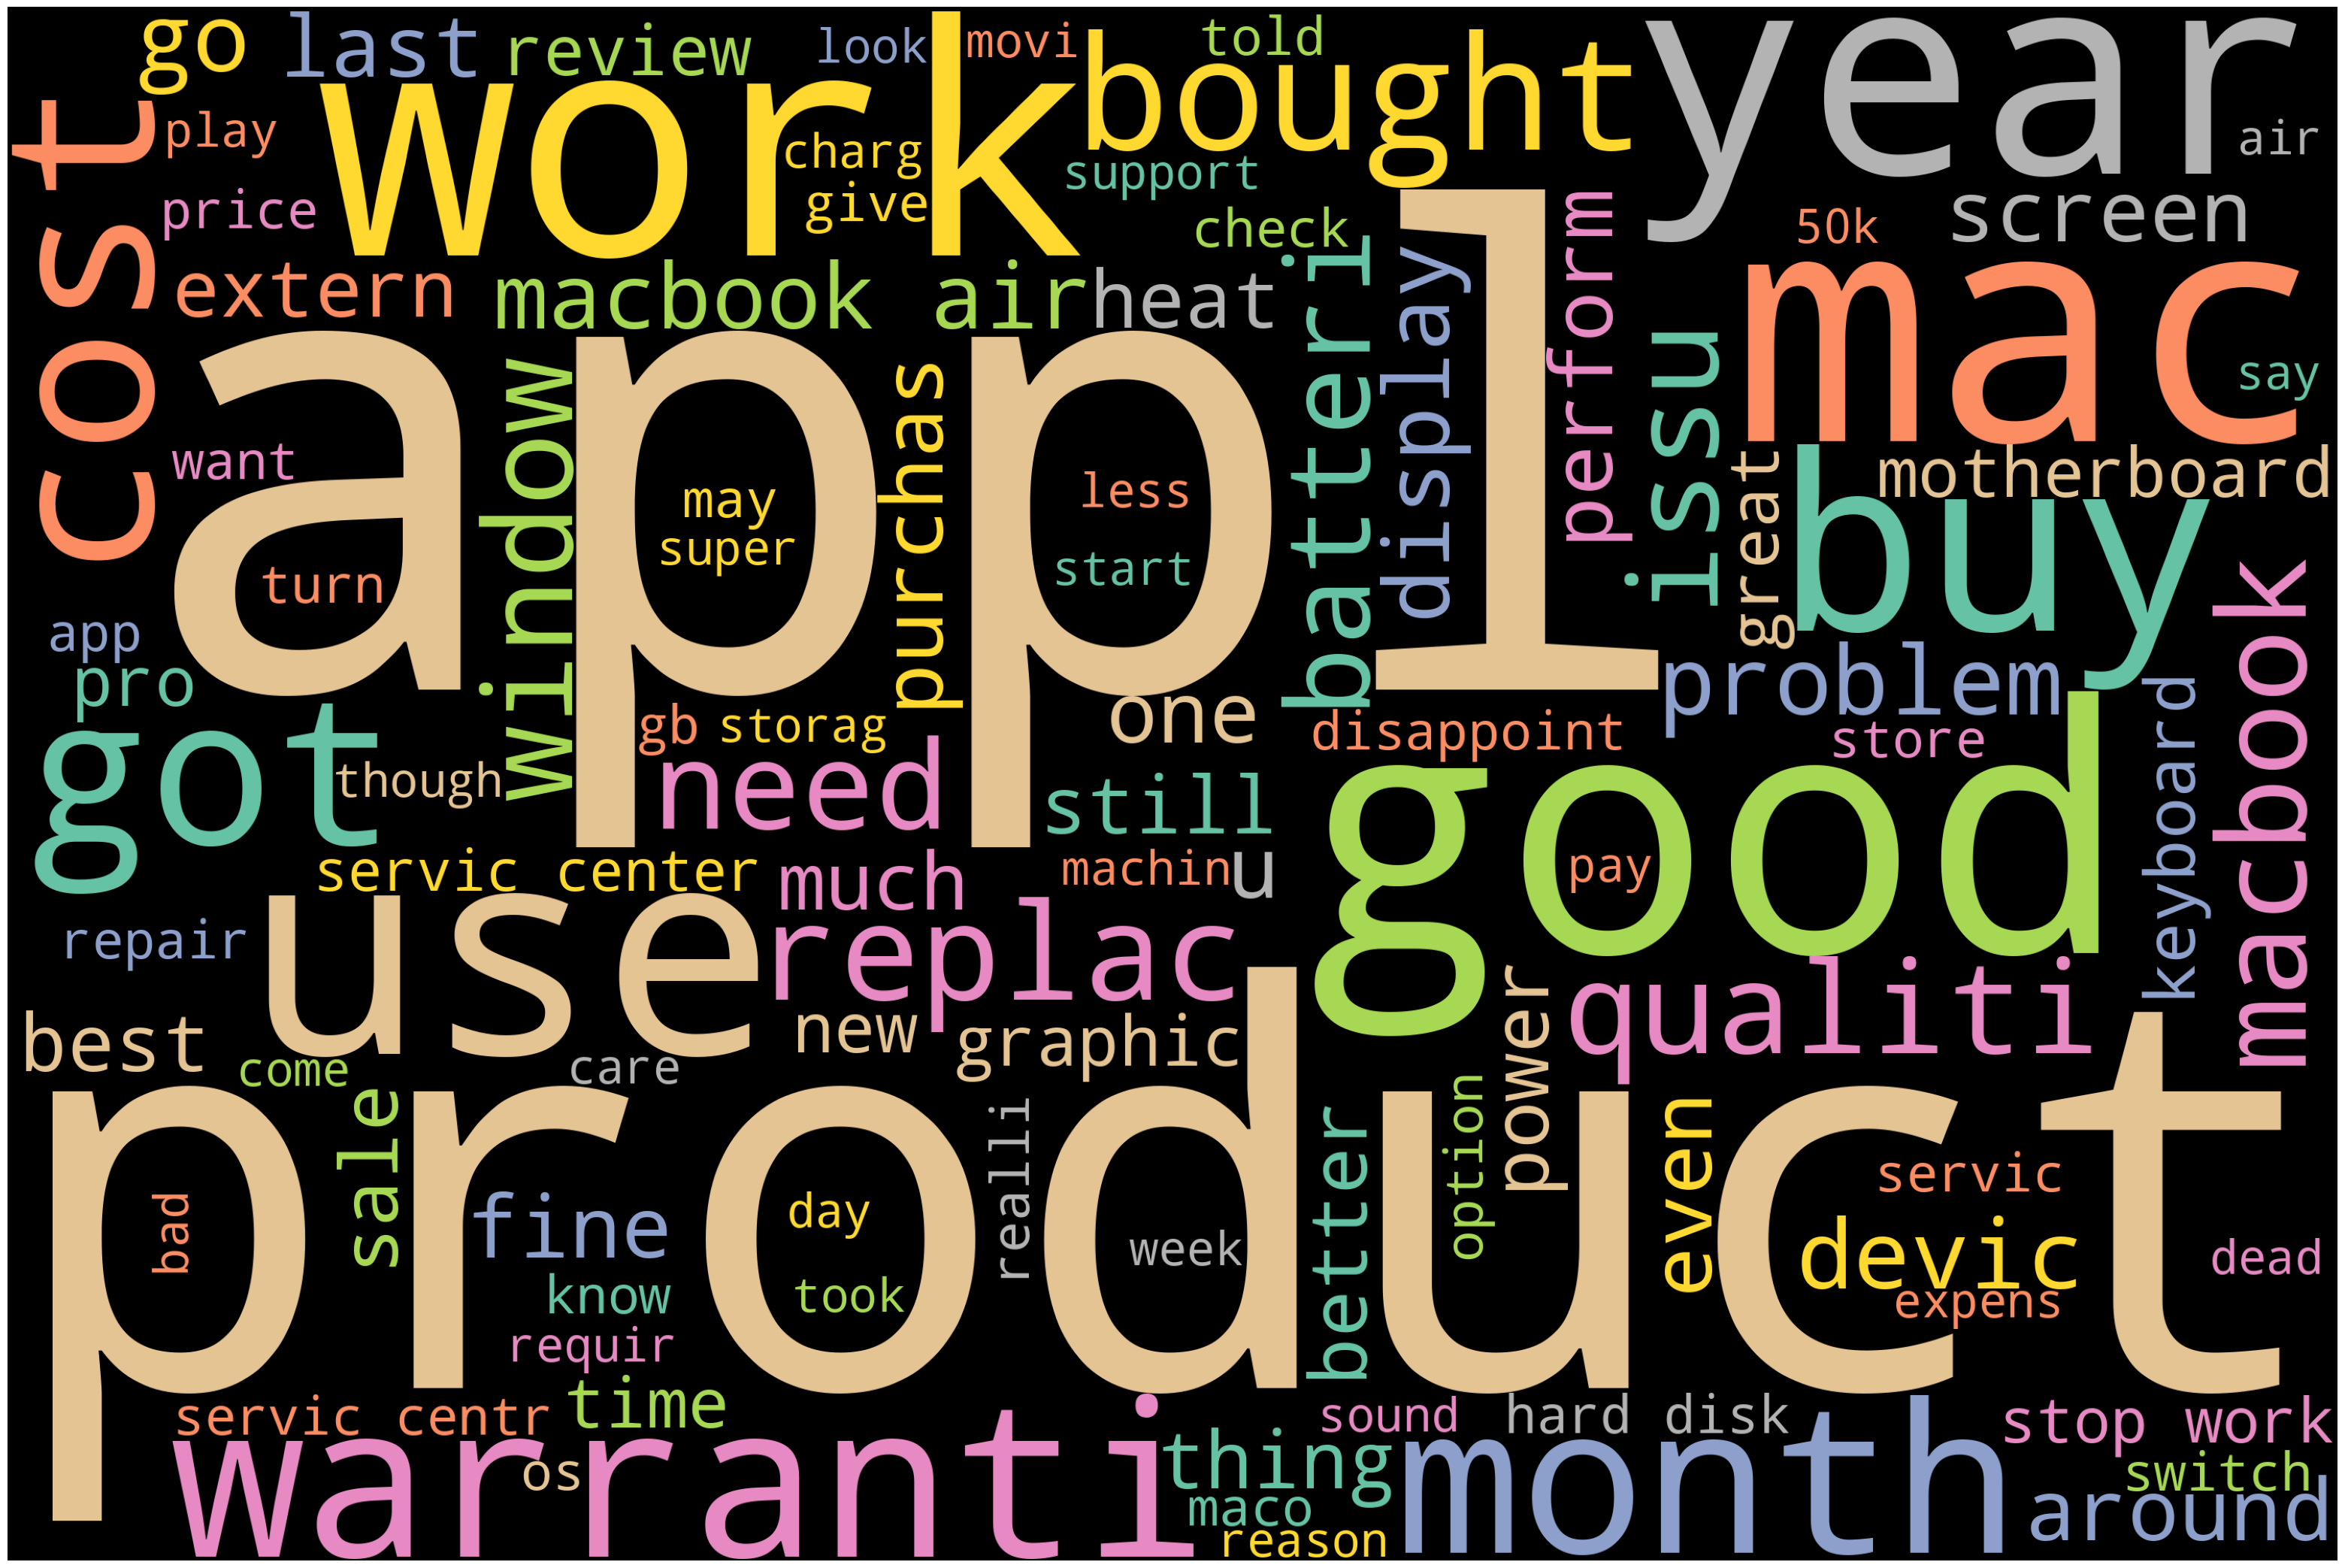

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('apple')
stopwords.add('Amazon')
stopwords.add('laptop')

wc = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wc)